# Uncorrelated Stochastic

In [1]:
# numeric experiment
import numpy as np
from tqdm import tqdm

def Experiment_SequentialPulling(C, d1, d2, r1, r2, random_seed, n_experiment):
    np.random.seed(random_seed)
    # the interval between neighbour consumption
    interval_consumption_1 = np.random.geometric(d1, size=(n_experiment, C))
    interval_consumption_2 = np.random.geometric(d2, size=(n_experiment, C))

    # at which round the demand is 1
    round_consumption_1 = np.cumsum(interval_consumption_1, axis=1)
    round_consumption_2 = np.cumsum(interval_consumption_2, axis=1)

    count_arm_1 = np.zeros(shape=n_experiment, dtype=int)
    count_arm_2 = np.zeros(shape=n_experiment, dtype=int)
    for c_count in range(1, C + 1):
        arm_index = (
            round_consumption_1[np.arange(0, n_experiment), count_arm_1]
            <= round_consumption_2[np.arange(0, n_experiment), count_arm_2]
        )
        count_arm_1[arm_index] = count_arm_1[arm_index] + 1
        count_arm_2[~arm_index] = count_arm_2[~arm_index] + 1
    stopping_time = np.maximum(
        round_consumption_1[np.arange(0, n_experiment), count_arm_1 - 1],
        round_consumption_2[np.arange(0, n_experiment), count_arm_2 - 1],
    )
    assert np.min(round_consumption_1) > 0, "numeric error"
    assert np.min(round_consumption_2) > 0, "numeric error"
    assert np.min(stopping_time) > 0, "numeric error"

    arm_1_total_reward = np.array([np.random.binomial(T, r1) for T in tqdm(stopping_time)])
    arm_2_total_reward = np.array([np.random.binomial(T, r2) for T in tqdm(stopping_time)])
    
    if r1 > r2:
        success_rate = np.sum(arm_1_total_reward > arm_2_total_reward) / n_experiment
    else:
        success_rate = np.sum(arm_1_total_reward < arm_2_total_reward) / n_experiment
    
    return success_rate, count_arm_1, count_arm_2

# d_list = np.array([1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6, 5e-7])
d_list = np.geomspace(start=1e-1, stop=1e-3, num=40)
n_experiment = 10000000
random_seed = 12345
success_list = np.zeros(len(d_list))
for ii, d in enumerate(d_list):
    r1 = 0.5
    r2 = 0.4
    d1 = d
    d2 = d
    C = 2
    success_rate, _, _ = Experiment_SequentialPulling(C, d1, d2, r1, r2, random_seed, n_experiment)
    print(f"d={d} done")
    success_list[ii] = success_rate
    
print(success_list)

100%|██████████| 10000000/10000000 [00:38<00:00, 258771.17it/s]


d=0.1 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260481.35it/s]


d=0.08886238162743403 done


100%|██████████| 10000000/10000000 [00:38<00:00, 257663.15it/s]


d=0.07896522868499725 done


100%|██████████| 10000000/10000000 [00:38<00:00, 256661.50it/s]


d=0.07017038286703829 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259366.13it/s]


d=0.06235507341273915 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259668.07it/s]


d=0.05541020330009492 done


100%|██████████| 10000000/10000000 [00:39<00:00, 256272.76it/s]


d=0.04923882631706739 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258922.14it/s]


d=0.043754793750741844 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258122.19it/s]


d=0.038881551803080894 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259222.34it/s]


d=0.0345510729459222 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259461.94it/s]


d=0.0307029062975785 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260471.20it/s]


d=0.02728333376486768 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259216.09it/s]


d=0.024244620170823284 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258075.74it/s]


d=0.021544346900318846 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259564.45it/s]


d=0.019144819761699575 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258537.64it/s]


d=0.017012542798525893 done


100%|██████████| 10000000/10000000 [00:38<00:00, 257993.21it/s]


d=0.015117750706156624 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259209.01it/s]


d=0.013433993325989001 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260421.63it/s]


d=0.01193776641714437 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258314.84it/s]


d=0.010608183551394482 done


100%|██████████| 10000000/10000000 [00:38<00:00, 261363.16it/s]


d=0.009426684551178854 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259740.87it/s]


d=0.008376776400682925 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259721.78it/s]


d=0.0074438030132516885 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260319.03it/s]


d=0.006614740641230145 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259857.46it/s]


d=0.0058780160722749115 done


100%|██████████| 10000000/10000000 [00:38<00:00, 262207.14it/s]


d=0.0052233450742668434 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260705.63it/s]


d=0.004641588833612782 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259654.08it/s]


d=0.004124626382901352 done


100%|██████████| 10000000/10000000 [00:38<00:00, 260268.13it/s]


d=0.003665241237079626 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258647.42it/s]


d=0.0032570206556597828 done


100%|██████████| 10000000/10000000 [00:38<00:00, 259512.75it/s]


d=0.0028942661247167516 done


100%|██████████| 10000000/10000000 [00:38<00:00, 256483.61it/s]


d=0.002571913809059347 done


100%|██████████| 10000000/10000000 [00:38<00:00, 257969.87it/s]


d=0.0022854638641349907 done


100%|██████████| 10000000/10000000 [00:39<00:00, 253259.99it/s]


d=0.002030917620904735 done


100%|██████████| 10000000/10000000 [00:39<00:00, 254683.03it/s]


d=0.0018047217668271701 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258743.59it/s]


d=0.001603718743751331 done


100%|██████████| 10000000/10000000 [00:39<00:00, 255659.03it/s]


d=0.0014251026703029992 done


100%|██████████| 10000000/10000000 [00:38<00:00, 257683.43it/s]


d=0.0012663801734674035 done


100%|██████████| 10000000/10000000 [00:38<00:00, 258735.49it/s]


d=0.0011253355826007646 done


100%|██████████| 10000000/10000000 [00:39<00:00, 255788.37it/s]


d=0.001 done
[0.6413452 0.6576471 0.6739118 0.6899939 0.7065553 0.7227861 0.7388264
 0.7549344 0.7705931 0.7867327 0.8020729 0.8169305 0.8316305 0.8457291
 0.859231  0.8722734 0.8845045 0.8961572 0.9070524 0.9173606 0.9265477
 0.9351849 0.9430612 0.9503144 0.956723  0.9625361 0.9678167 0.9722996
 0.9764211 0.9799552 0.98304   0.9857612 0.9880817 0.990089  0.9917671
 0.9931763 0.994355  0.9953551 0.9961973 0.9969284]


In [2]:
np.save("./fail-d-d_list.npy", d_list)
np.save("./fail-d-success.npy", success_list)

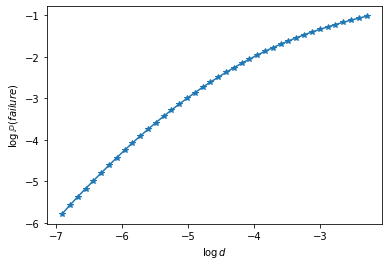

In [3]:
import matplotlib.pyplot as plt

# d_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-d_list.npy")
# success_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-success.npy")

index = 1-success_list >= 1e-6
d_list = d_list[index]
success_list = success_list[index]

plt.figure()
plt.plot(np.log(d_list), np.log(1-success_list), "-*")
plt.xlabel(r"$\log d$")
plt.ylabel(r"$\log \mathbb{P}(failure)$")
plt.show()

# Deterministic Consumption

In [4]:
# numeric experiment
import numpy as np
from tqdm import tqdm

def Experiment_Deterministic_consumption(C, d1, d2, r1, r2, random_seed, n_experiment):
    np.random.seed(random_seed)

    # generate sample path
    n = int(np.floor(C / (d1 + d2)))
    batch_size = 10000
    success_or_not = np.zeros(n_experiment)
    for batch_id in tqdm(range(n_experiment // batch_size + 1)):
        if batch_id == n_experiment // batch_size:
            index = np.arange(batch_id * batch_size, n_experiment)
        else:
            index = np.arange(batch_id * batch_size, (batch_id+1) * batch_size)
                
        reward_1 = np.random.binomial(n, r1, size=len(index))
        reward_2 = np.random.binomial(n, r2, size=len(index))
#         if d1 < 1e-5:
#             print(f"n {n}, reward_1 {reward_1[0:5]}, reward_2 {reward_2[0:5]}")
#             assert False
        
        if r1 > r2:
            success_or_not[index] = reward_1 > reward_2
        else:
            success_or_not[index] = reward_1 <= reward_2
            
    return np.mean(success_or_not)

# d_list_inverse = np.arange(2500, 17500, 2500)
# d_list = 1. / d_list_inverse
d_list = np.geomspace(start=1e-1, stop=1e-3, num=40)

n_experiment = 10000000
random_seed = 12345
success_list = np.zeros(len(d_list))
for ii, d in enumerate(d_list):
    r1 = 0.5
    r2 = 0.4
    d1 = d
    d2 = d
    C = 2
    success_rate = Experiment_Deterministic_consumption(C, d1, d2, r1, r2, random_seed, n_experiment)
    print(f"d={d} done")
    success_list[ii] = success_rate
print(success_list)

100%|██████████| 1001/1001 [00:01<00:00, 761.80it/s]


d=0.1 done


100%|██████████| 1001/1001 [00:01<00:00, 701.73it/s]


d=0.08886238162743403 done


100%|██████████| 1001/1001 [00:01<00:00, 675.81it/s]


d=0.07896522868499725 done


100%|██████████| 1001/1001 [00:01<00:00, 614.52it/s]


d=0.07017038286703829 done


100%|██████████| 1001/1001 [00:01<00:00, 564.46it/s]


d=0.06235507341273915 done


100%|██████████| 1001/1001 [00:01<00:00, 525.68it/s]


d=0.05541020330009492 done


100%|██████████| 1001/1001 [00:02<00:00, 486.57it/s]


d=0.04923882631706739 done


100%|██████████| 1001/1001 [00:02<00:00, 451.27it/s]


d=0.043754793750741844 done


100%|██████████| 1001/1001 [00:02<00:00, 414.67it/s]


d=0.038881551803080894 done


100%|██████████| 1001/1001 [00:02<00:00, 380.09it/s]


d=0.0345510729459222 done


100%|██████████| 1001/1001 [00:02<00:00, 345.12it/s]


d=0.0307029062975785 done


100%|██████████| 1001/1001 [00:03<00:00, 312.09it/s]


d=0.02728333376486768 done


100%|██████████| 1001/1001 [00:03<00:00, 282.47it/s]


d=0.024244620170823284 done


100%|██████████| 1001/1001 [00:03<00:00, 259.72it/s]


d=0.021544346900318846 done


100%|██████████| 1001/1001 [00:04<00:00, 233.41it/s]


d=0.019144819761699575 done


100%|██████████| 1001/1001 [00:04<00:00, 214.89it/s]


d=0.017012542798525893 done


100%|██████████| 1001/1001 [00:03<00:00, 282.38it/s]


d=0.015117750706156624 done


100%|██████████| 1001/1001 [00:03<00:00, 261.62it/s]


d=0.013433993325989001 done


100%|██████████| 1001/1001 [00:02<00:00, 420.40it/s]


d=0.01193776641714437 done


100%|██████████| 1001/1001 [00:02<00:00, 431.26it/s]


d=0.010608183551394482 done


100%|██████████| 1001/1001 [00:02<00:00, 456.24it/s]


d=0.009426684551178854 done


100%|██████████| 1001/1001 [00:02<00:00, 451.55it/s]


d=0.008376776400682925 done


100%|██████████| 1001/1001 [00:02<00:00, 474.15it/s]


d=0.0074438030132516885 done


100%|██████████| 1001/1001 [00:02<00:00, 484.58it/s]


d=0.006614740641230145 done


100%|██████████| 1001/1001 [00:02<00:00, 488.47it/s]


d=0.0058780160722749115 done


100%|██████████| 1001/1001 [00:01<00:00, 508.41it/s]


d=0.0052233450742668434 done


100%|██████████| 1001/1001 [00:01<00:00, 503.30it/s]


d=0.004641588833612782 done


100%|██████████| 1001/1001 [00:01<00:00, 533.58it/s]


d=0.004124626382901352 done


100%|██████████| 1001/1001 [00:01<00:00, 541.21it/s]


d=0.003665241237079626 done


100%|██████████| 1001/1001 [00:01<00:00, 554.07it/s]


d=0.0032570206556597828 done


100%|██████████| 1001/1001 [00:01<00:00, 564.50it/s]


d=0.0028942661247167516 done


100%|██████████| 1001/1001 [00:01<00:00, 568.72it/s]


d=0.002571913809059347 done


100%|██████████| 1001/1001 [00:01<00:00, 577.48it/s]


d=0.0022854638641349907 done


100%|██████████| 1001/1001 [00:01<00:00, 589.02it/s]


d=0.002030917620904735 done


100%|██████████| 1001/1001 [00:01<00:00, 604.19it/s]


d=0.0018047217668271701 done


100%|██████████| 1001/1001 [00:01<00:00, 602.22it/s]


d=0.001603718743751331 done


100%|██████████| 1001/1001 [00:01<00:00, 636.33it/s]


d=0.0014251026703029992 done


100%|██████████| 1001/1001 [00:01<00:00, 628.76it/s]


d=0.0012663801734674035 done


100%|██████████| 1001/1001 [00:01<00:00, 619.29it/s]


d=0.0011253355826007646 done


100%|██████████| 1001/1001 [00:01<00:00, 634.37it/s]

d=0.001 done
[0.5919946 0.6042671 0.615811  0.6363869 0.6544445 0.6706682 0.6853513
 0.6987982 0.7171919 0.7335331 0.7530158 0.7702298 0.7893522 0.8062228
 0.8242341 0.8399101 0.8583683 0.8740427 0.8892257 0.9050573 0.9191211
 0.9319913 0.9441705 0.9549069 0.9645444 0.9725144 0.9794386 0.9851159
 0.9894549 0.9930135 0.9954523 0.9971869 0.9984038 0.9991227 0.9995538
 0.9997871 0.9999066 0.9999629 0.9999882 0.9999959]


In [5]:
np.save("./fail-d-d_list-deterministic.npy", d_list)
np.save("./fail-d-success-deterministic.npy", success_list)

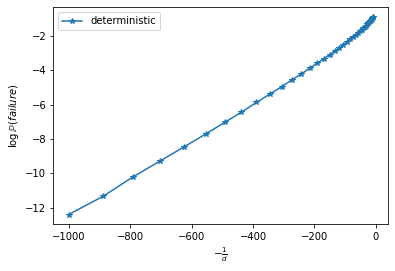

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# d_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-d_list.npy")
# success_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-success.npy")
# index = 1-success_list >= 1e-6 # sift the available record
# d_list = d_list[index]
# success_list = success_list[index]
# plt.plot(np.log(d_list), np.log(1-success_list), "-*", label="stochastic-uncorrelated")

# d_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-d_list-deterministic.npy")
# success_list = np.load("./Numeric-Record/Check_FailureProb_Expression/fail-d-success-deterministic.npy")
index = 1-success_list >= 1e-6 # sift the available record
d_list = d_list[index]
success_list = success_list[index]
plt.plot(-1/d_list, np.log(1-success_list), "-*", label="deterministic")

plt.xlabel(r"$-\frac{1}{d}$")
plt.ylabel(r"$\log \mathbb{P}(failure)$")
plt.legend()
plt.show()

# Plot the figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


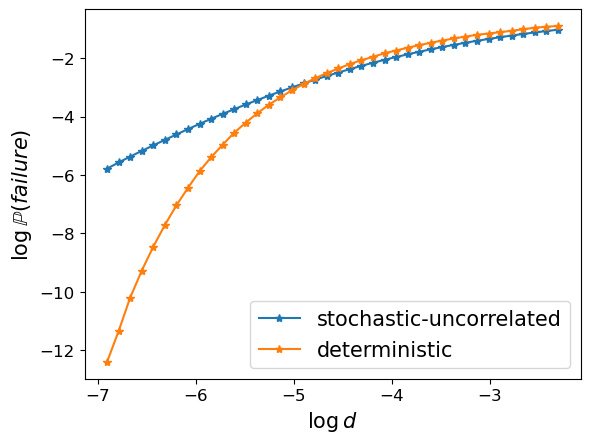

In [1]:
# plot the result
%reset -f
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

legend_fontsize = 15
label_fontsize = 15
axis_fontsize = 12

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure()

d_list = np.load("./fail-d-d_list.npy")
success_list = np.load("./fail-d-success.npy")
index = 1-success_list >= 0 # sift the available record
d_list = d_list[index]
success_list = success_list[index]
plt.plot(np.log(d_list), np.log(1-success_list), "-*", label="stochastic-uncorrelated")

d_list = np.load("./fail-d-d_list-deterministic.npy")
success_list = np.load("./fail-d-success-deterministic.npy")
index = 1-success_list >= 0 # sift the available record
d_list = d_list[index]
success_list = success_list[index]
# plt.plot(-1/d_list, np.log(1-success_list), "-*", label="deterministic")
plt.plot(np.log(d_list), np.log(1-success_list), "-*", label="deterministic")

plt.xlabel(r"$\log d$", fontsize=label_fontsize)
plt.ylabel(r"$\log \mathbb{P}(failure)$", fontsize=label_fontsize)

plt.xticks(fontsize=axis_fontsize)
plt.yticks(fontsize=axis_fontsize)
plt.legend(fontsize=legend_fontsize)

plt.savefig("./validate-formula-geometric_d.eps", bbox_inches='tight')
plt.show()